In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf


column_names = [
    'Status of existing checking account', 'Duration in month', 'Credit history',
    'Purpose', 'Credit amount', 'Savings account/bonds', 'Present employment since',
    'Installment rate in percentage of disposable income', 'Personal status and sex',
    'Other debtors / guarantors', 'Present residence since', 'Property', 'Age in years',
    'Other installment plans', 'Housing', 'Number of existing credits at this bank',
    'Job', 'Number of people being liable to provide maintenance for', 'Telephone',
    'foreign worker', 'Good/Bad'
]

df = pd.read_csv('german.data', delim_whitespace=True, header=None, names=column_names)
df


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Good/Bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [21]:
df.to_csv('dataset.csv', index=False)
df['Installment rate in percentage of disposable income'].value_counts()

,count
Installment rate in percentage of disposable income,
4,476
2,231
3,157
1,136


In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
categorical_columns = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds',
                        'Present employment since', 'Personal status and sex', 'Other debtors / guarantors',
                        'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'foreign worker']

encoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")

encoder.fit(X_train[categorical_columns])

X_train_encoded = encoder.transform(X_train[categorical_columns])
X_val_encoded = encoder.transform(X_val[categorical_columns])
print(X_val_encoded.index)

Index([521, 737, 740, 660, 411, 678, 626, 513, 859, 136,
       ...
       948, 829, 656, 199, 213, 408, 332, 208, 613,  78],
      dtype='int64', length=200)


In [5]:
numerical_columns = ['Duration in month', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present residence since',
                     'Age in years', 'Number of existing credits at this bank', 'Number of people being liable to provide maintenance for']


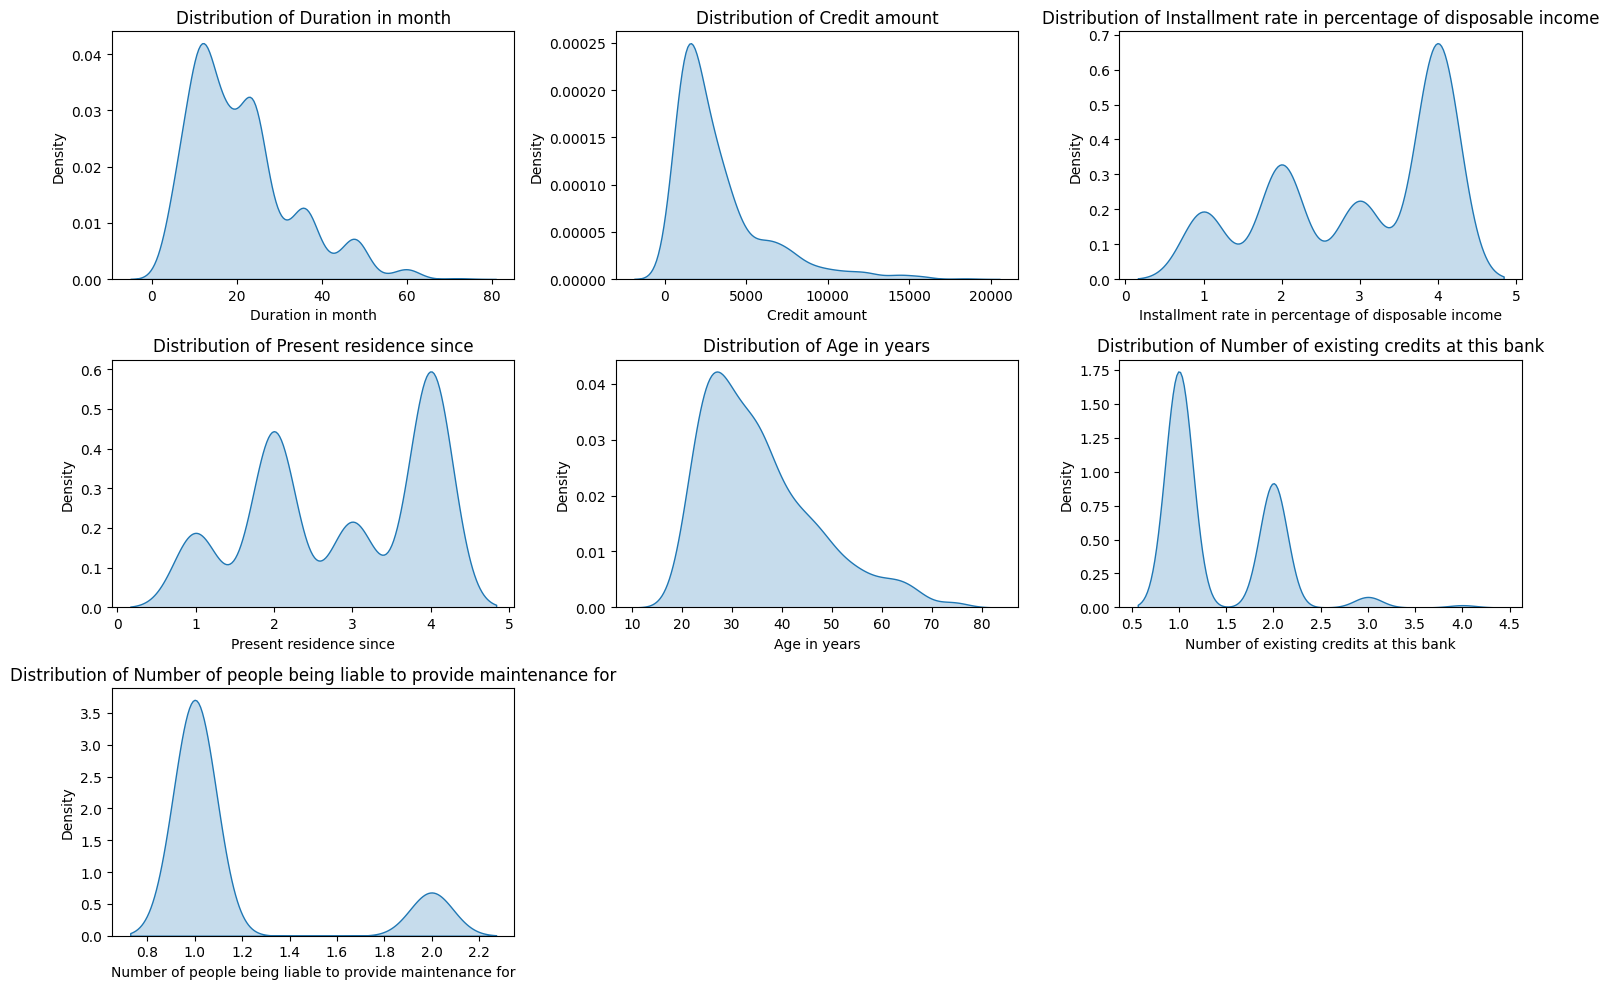

In [6]:
columns_to_plot = numerical_columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.kdeplot(data=df[col], ax=axes[i], shade = True)
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [7]:

scaler = StandardScaler()

X_train_scaled = X_train_encoded.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_val_scaled = X_val_encoded.copy()
X_val_scaled[numerical_columns] = scaler.transform(X_val[numerical_columns])

In [8]:
X_merged = pd.concat([X_train_scaled, X_val_scaled], axis=0)
X_merged

,Status of existing checking account_A12,Status of existing checking account_A13,Status of existing checking account_A14,Credit history_A31,Credit history_A32,Credit history_A33,Credit history_A34,Purpose_A41,Purpose_A410,Purpose_A42,...,Job_A174,Telephone_A192,foreign worker_A202,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
29,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.297082,1.199912,0.031196,1.044509,2.406187,1.017777,-0.409736
535,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.008051,-0.359630,-0.860109,-1.671440,-0.224364,-0.710931,-0.409736
695,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-1.279256,-0.733547,-0.860109,1.044509,1.266282,-0.710931,-0.409736
557,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.008051,0.567050,-1.751413,1.044509,-0.575104,1.017777,-0.409736
836,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.770774,-0.854388,0.922500,-0.766124,-1.276585,-0.710931,-0.409736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.246190,-0.043371,0.031196,-0.766124,-0.838159,-0.710931,-0.409736
332,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.297082,1.397401,0.922500,-0.766124,-1.013530,-0.710931,-0.409736
208,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.246190,1.107382,-0.860109,-0.766124,-1.276585,-0.710931,-0.409736
613,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.246190,0.093697,-1.751413,1.044509,-1.188900,-0.710931,-0.409736


In [9]:
X_merged['Number of people being liable to provide maintenance for'].value_counts()

,count
Number of people being liable to provide maintenance for,
-0.409736,845
2.440599,155


In [10]:
percentage_dict = {}
for c in categorical_columns:
  percentage = df[c].value_counts(normalize=True) * 100
  percentage_dict[c] = percentage
percentage_dict

{'Status of existing checking account': Status of existing checking account
 A14    39.4
 A11    27.4
 A12    26.9
 A13     6.3
 Name: proportion, dtype: float64,
 'Credit history': Credit history
 A32    53.0
 A34    29.3
 A33     8.8
 A31     4.9
 A30     4.0
 Name: proportion, dtype: float64,
 'Purpose': Purpose
 A43     28.0
 A40     23.4
 A42     18.1
 A41     10.3
 A49      9.7
 A46      5.0
 A45      2.2
 A44      1.2
 A410     1.2
 A48      0.9
 Name: proportion, dtype: float64,
 'Savings account/bonds': Savings account/bonds
 A61    60.3
 A65    18.3
 A62    10.3
 A63     6.3
 A64     4.8
 Name: proportion, dtype: float64,
 'Present employment since': Present employment since
 A73    33.9
 A75    25.3
 A74    17.4
 A72    17.2
 A71     6.2
 Name: proportion, dtype: float64,
 'Personal status and sex': Personal status and sex
 A93    54.8
 A92    31.0
 A94     9.2
 A91     5.0
 Name: proportion, dtype: float64,
 'Other debtors / guarantors': Other debtors / guarantors
 A101    

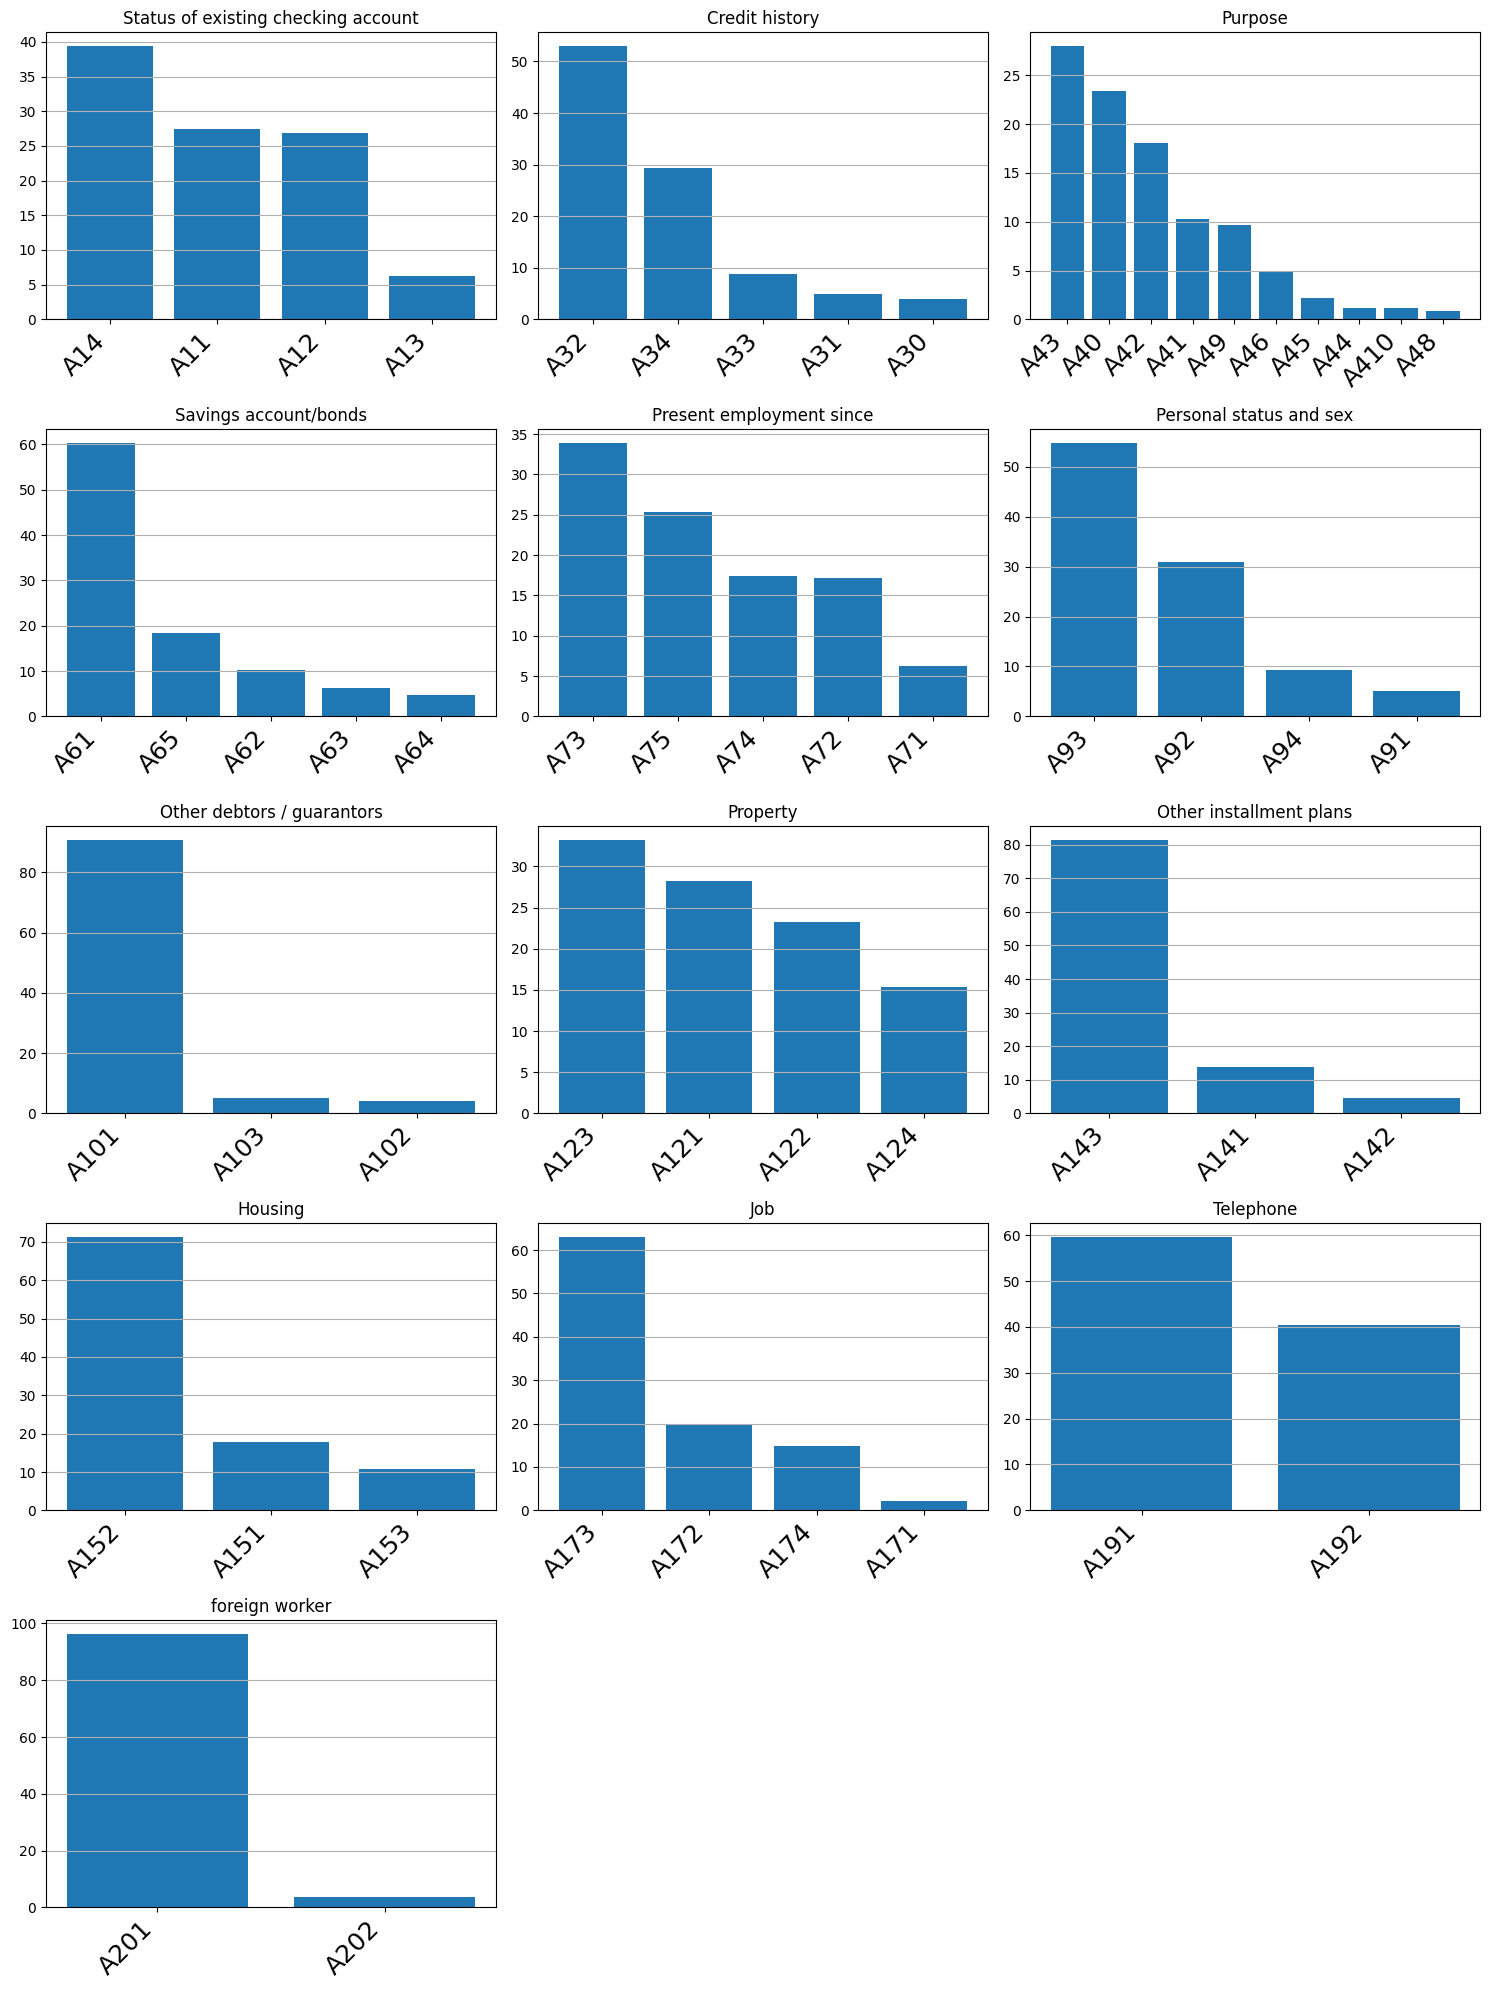

In [22]:
num_columns = 3
num_rows = 5

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

axs = axs.flatten()

for i, c in enumerate(categorical_columns):
    axs[i].bar(percentage_dict[c].index, percentage_dict[c].values)
    axs[i].set_title(c)
    axs[i].set_xticklabels(percentage_dict[c].index, rotation=45, ha='right', fontsize=18)
    axs[i].grid(axis='y')


for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [12]:
percentage = df.iloc[:,-1].value_counts(normalize=True) * 100
percentage.rename(index={1: 'Good', 2: 'Bad'}, inplace = True)
percentage

,proportion
Good/Bad,
Good,70.0
Bad,30.0


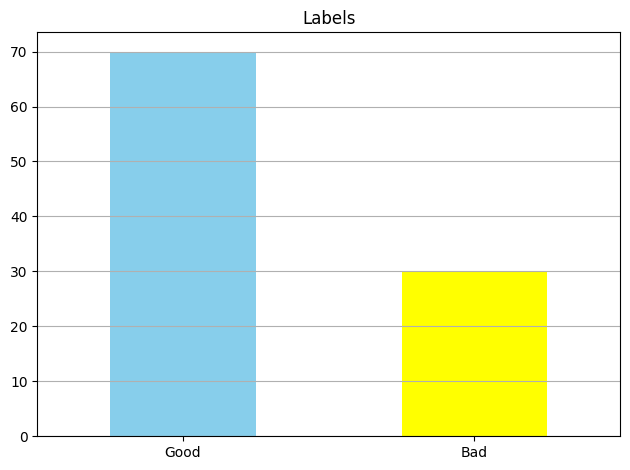

In [13]:
percentage.plot.bar(color = ['skyblue', 'yellow'])
plt.title('Labels')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

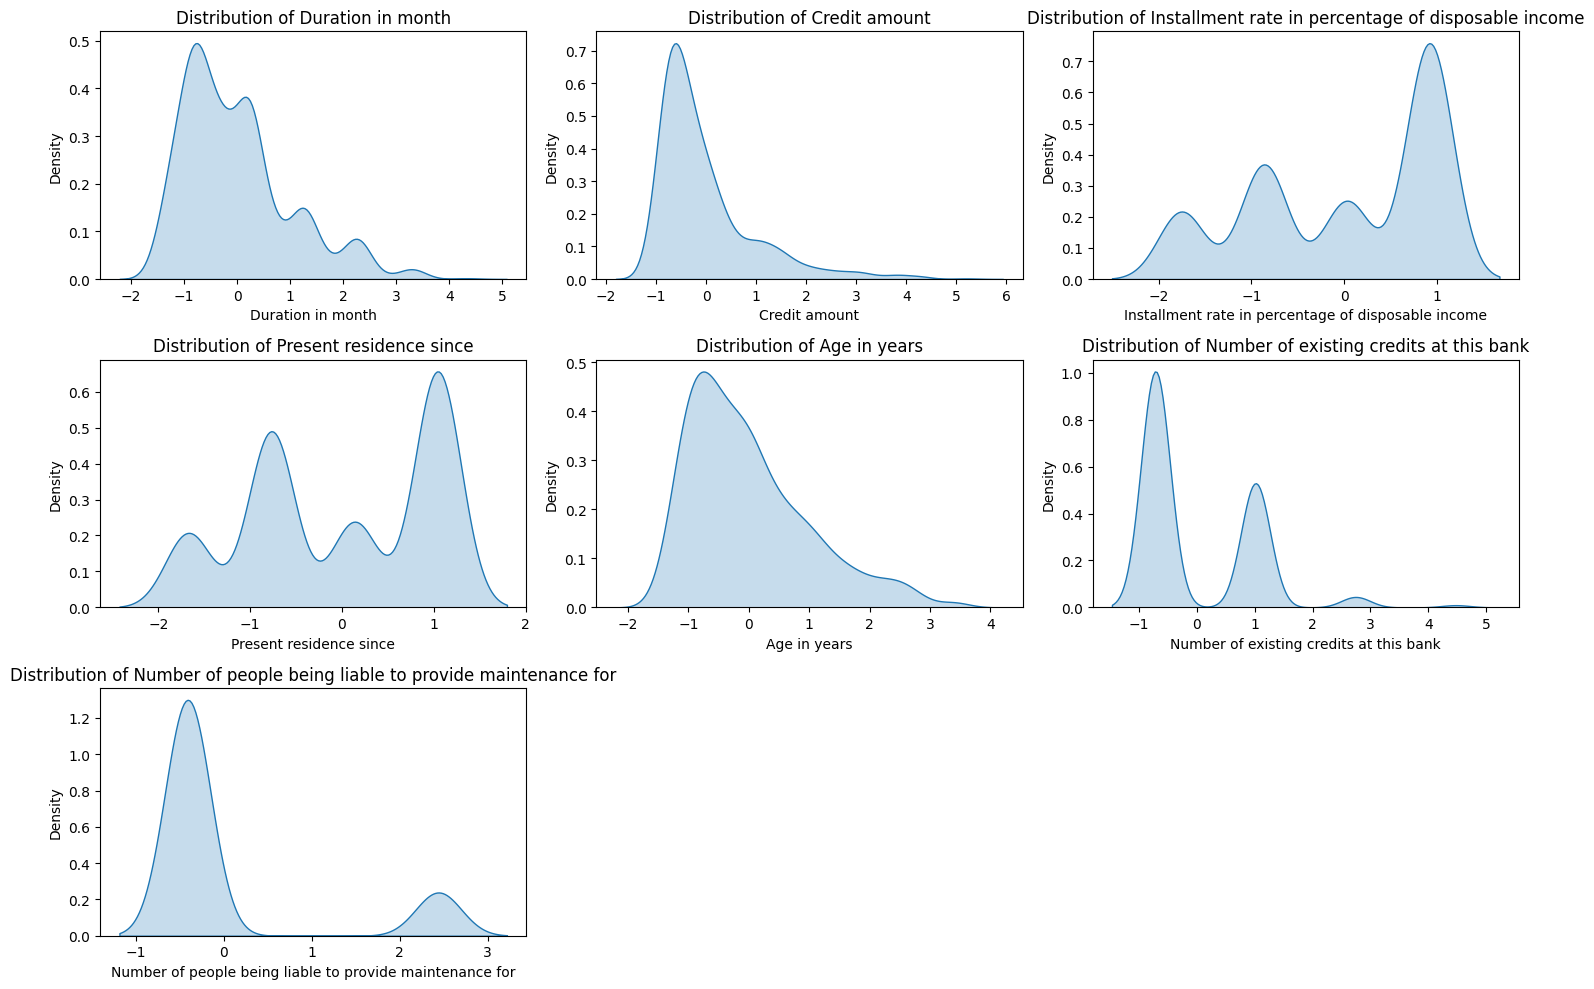

In [14]:
columns_to_plot = numerical_columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.kdeplot(data=X_merged[col], ax=axes[i], shade = True)
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

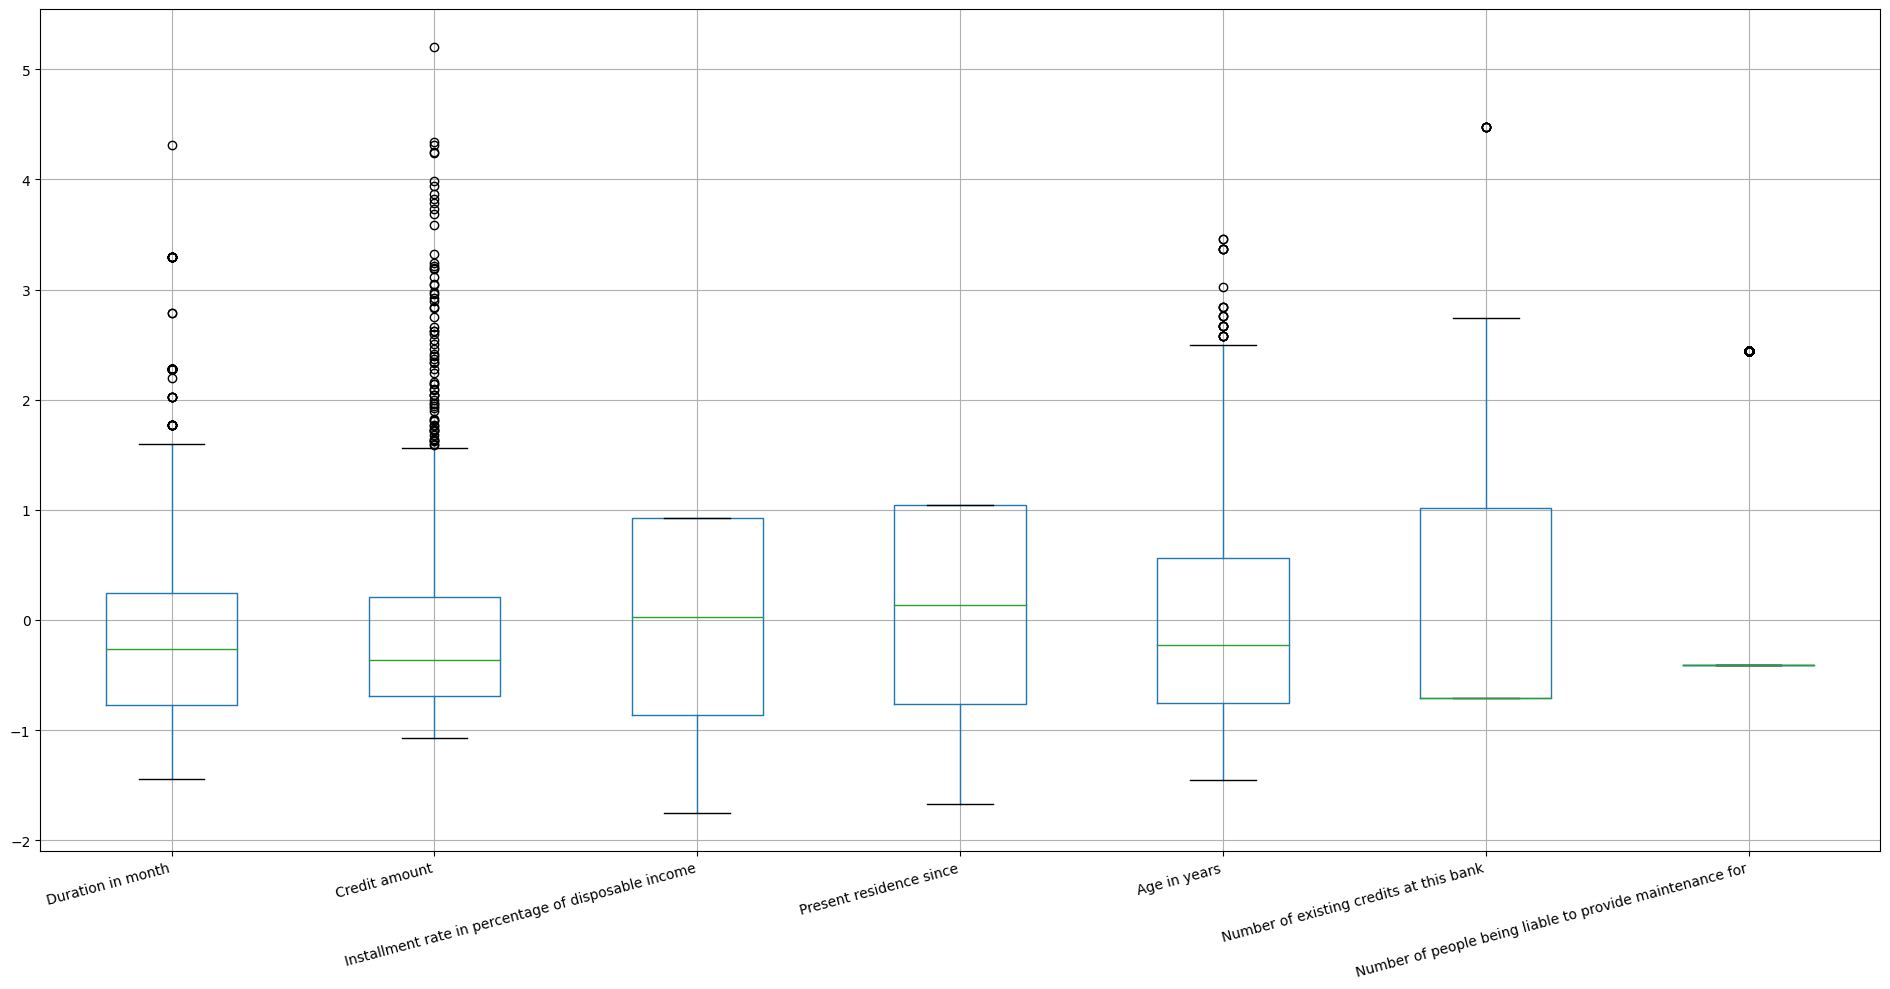

In [15]:
boxplot = X_merged.boxplot(column=numerical_columns, figsize = (19,10))
plt.xticks(rotation=15, ha='right')  # 'ha' stands for horizontal alignment
plt.tight_layout()


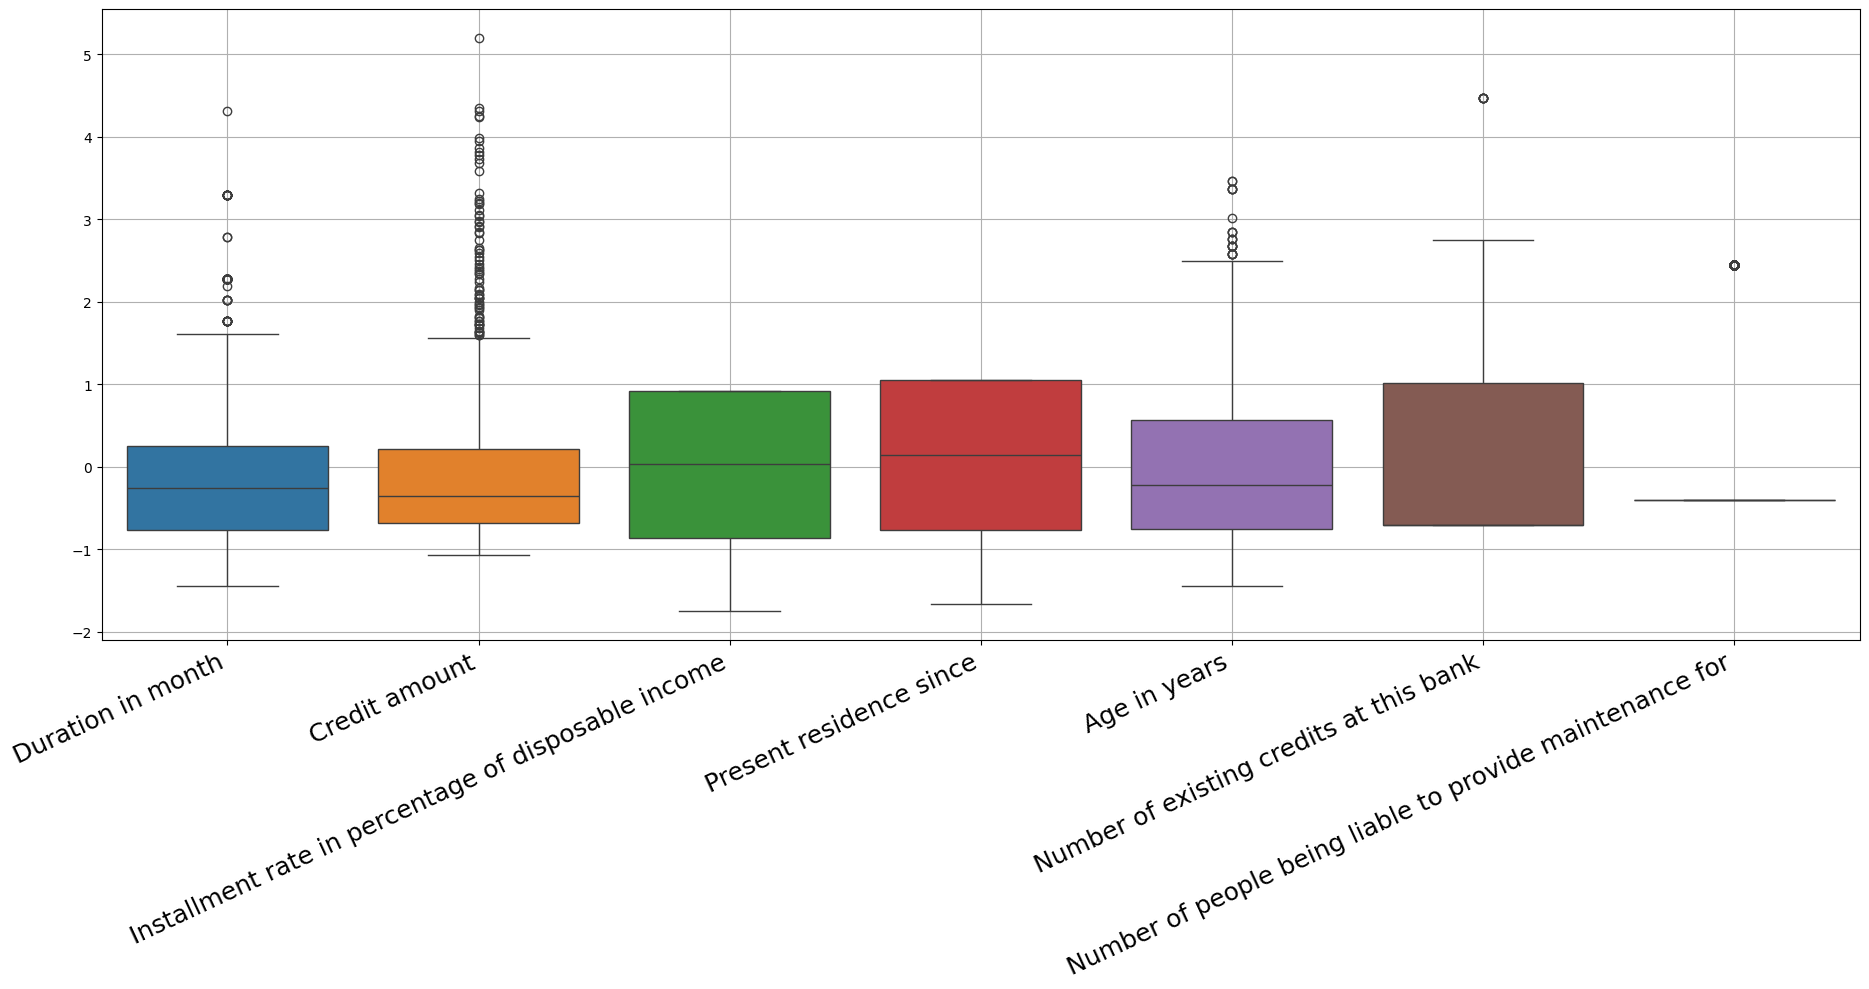

In [16]:
plt.figure(figsize=(19, 10))
sns.boxplot(data = X_merged[numerical_columns])
plt.xticks(rotation=25, ha='right', fontsize=18)
plt.grid()
plt.tight_layout()


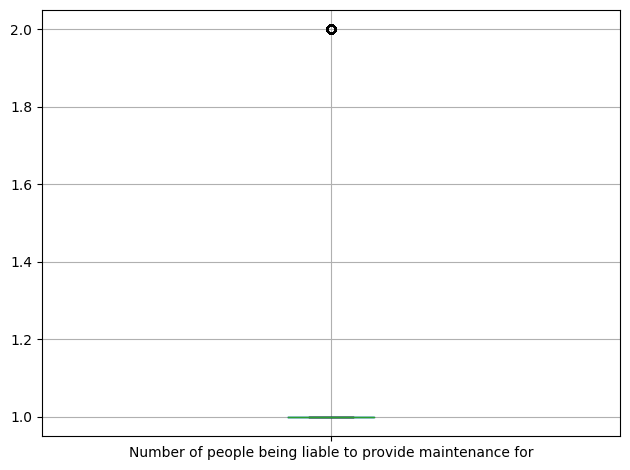

In [17]:
boxplot = df.boxplot(column='Number of people being liable to provide maintenance for')
plt.tight_layout()


In [18]:
df_stat = df.iloc[:,:-1]
df_stat = df_stat.describe()
df_stat

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [19]:
df_stat.drop(labels = ['count', '25%', '75%'], inplace = True)
df_stat = round(df_stat, 1)
df_stat

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
mean,20.9,3271.3,3.0,2.8,35.5,1.4,1.2
std,12.1,2822.7,1.1,1.1,11.4,0.6,0.4
min,4.0,250.0,1.0,1.0,19.0,1.0,1.0
50%,18.0,2319.5,3.0,3.0,33.0,1.0,1.0
max,72.0,18424.0,4.0,4.0,75.0,4.0,2.0


In [20]:
df_stat.to_csv('numerical_stats.csv', index=False)